# Programming Assignment 1
* CSCI-5930 ML Spring 2019
* Author: Anju Mohan

## Tasks for everyone (Tasks 1-15)

### TASK 1: Import all the necessary packages here


In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import array
from numpy.linalg import inv
from numpy import array, dot, transpose
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')





### TASK 2: Load the dataset into memory so that you can play with it here

In [207]:
df_train = pd.read_csv('data/baby-weights-dataset2.csv')
df_test = pd.read_csv('data/judge-without-labels.csv')
print(df_train.shape)
print(df_train.info())
#print("*"*50)
#print(df_test.shape)
#print(df_test.info())



(101400, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101400 entries, 0 to 101399
Data columns (total 37 columns):
ID          101400 non-null int64
SEX         101400 non-null int64
MARITAL     101400 non-null int64
FAGE        101400 non-null int64
GAINED      101400 non-null int64
VISITS      101400 non-null int64
MAGE        101400 non-null int64
FEDUC       101400 non-null int64
MEDUC       101400 non-null int64
TOTALP      101400 non-null int64
BDEAD       101400 non-null int64
TERMS       101400 non-null int64
LOUTCOME    101400 non-null int64
WEEKS       101400 non-null int64
RACEMOM     101400 non-null int64
RACEDAD     101400 non-null int64
HISPMOM     101400 non-null object
HISPDAD     101400 non-null object
CIGNUM      101400 non-null int64
DRINKNUM    101400 non-null int64
ANEMIA      101400 non-null int64
CARDIAC     101400 non-null int64
ACLUNG      101400 non-null int64
DIABETES    101400 non-null int64
HERPES      101400 non-null int64
HYDRAM      101400 non-n

### TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [100]:
df_train['BWEIGHT'].describe()




count    101400.000000
mean          7.258066
std           1.329461
min           0.187500
25%           6.625000
50%           7.375000
75%           8.062500
max          13.062500
Name: BWEIGHT, dtype: float64

### TASK 4: Also, draw the histogram plot for the BWEIGHT variable


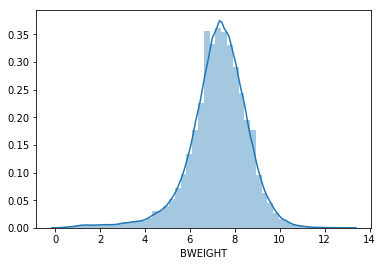

In [101]:
sns.distplot(df_train['BWEIGHT']);






### TASK 5: Present the skewness and kurtosis of the BWEIGHT target variable

In [102]:
print("Skewness: %f" % df_train['BWEIGHT'].skew())
print("Kurtosis: %f" % df_train['BWEIGHT'].kurt())






Skewness: -0.936593
Kurtosis: 2.868780


### TASK 6: Do variable selection from the pool of 36 variables based on correlation score with the target variable BWEIGHT 
### Please report all the variables you kept for training.

In [115]:
target='BWEIGHT'

#introducing dummy variables for categorical features
df_train = pd.get_dummies(df_train)
list(df_train.columns)

#correlation matrix
corr = df_train.corr()
corr_abs= corr.abs() #Absolute correlation value

nr_all_cols = len(df_train)
ser_corr= corr_abs.nlargest(nr_all_cols, target)[target]

print(ser_corr)

min_val_corr = 0.06

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

cols_abv_corr_limit

#WEEKS,GAINED,VISITS,HYPERPR,MARITAL,SEX,CIGNUM,RACEDAD,RACEMOM,PRETERM,MAGE,ECLAMP,PINFANT,CERVIX.

df_train.drop(cols_bel_corr_limit , inplace= True, axis = 1)

df_train

BWEIGHT    1.000000
WEEKS      0.565376
GAINED     0.173262
VISITS     0.129587
HYPERPR    0.108541
MARITAL    0.107106
SEX        0.093440
CIGNUM     0.090670
RACEDAD    0.084056
RACEMOM    0.079893
PRETERM    0.072932
MAGE       0.068473
ECLAMP     0.068073
PINFANT    0.067073
CERVIX     0.066935
MEDUC      0.055908
FEDUC      0.052673
FAGE       0.051447
HYDRAM     0.050001
Name: BWEIGHT, dtype: float64


SEX  MARITAL  GAINED  VISITS  MAGE  WEEKS  RACEMOM  RACEDAD  CIGNUM  \
0         2        1      26      10    34     35        1        1       0   
1         2        2      40      10    18     41        1        1       0   
2         2        1      16      14    31     39        1        1       0   
3         1        1      40      15    28     38        8        1       0   
4         1        2      60      13    20     40        2        2       0   
5         1        1      30      15    21     42        1        1       0   
6         1        2      20      11    32     39        1        1       0   
7         2        2      41      15    21     41        1        2       0   
8         2        1       0      12    26     38        1        1       0   
9         1        1      30      10    22     39        1        1       0   
10        2        2      15      22    29     39        2        2       0   
11        1        2      30      13    23     38        8        8       0   
12        2        1      47      13    36     38        1        1       5   
13        2        2      38       9    20     41        1        1       0   
14        1        1      60      12    23     39        1        1       0   
15        2        2      51      11    19     40        1        1       0   
16        2        1      27      12    28     36        1        2       0   
17        2        1      28      13    32     39        8        8       0   
18        1        1      20       5    23     37        1        1       0   
19        1        1      52      10    23     38        1        1      20   
20        2        1      25      12    30     40        1        1       0   
21        2        1      35      20    30     39        1        1       0   
22        2        1      55       7    25     32        1        1       0   
23        1        1      27      19    34     37        1        1       0   
24        1        1      40      15    23     39        1        3       0   
25        2        1      17      10    31     38        1        1       0   
26        1        1      38       8    21     39        2        2       0   
27        1        1      50      10    27     36        1        1       0   
28        2        2      12      10    41     39        1        2       0   
29        2        1      19      10    34     22        2        2       0   
...     ...      ...     ...     ...   ...    ...      ...      ...     ...   
101370    1        2      14      12    19     36        2        2       0   
101371    2        1      30      12    28     39        1        1       0   
101372    1        1      30      12    21     32        1        1       0   
101373    1        2      17       8    36     28        2        2       0   
101374    1        1      40      15    26     40        1        1       0   
101375    2        1      20      10    28     35        1        1       0   
101376    1        1      21      14    20     37        1        1       0   
101377    2        2      55      16    24     38        1        1       0   
101378    1        2      33      10    21     37        1        1       0   
101379    2        2      52      12    31     39        1        2       0   
101380    2        1      50      18    30     41        1        1       0   
101381    2        1      16      15    28     39        1        1       0   
101382    2        1      35      13    22     41        1        1       0   
101383    1        1      19       9    22     40        2        2       0   
101384    2        2      18      14    30     38        1        2       0   
101385    2        1      55      10    28     38        1        1       0   
101386    2        2      20      12    27     40        1        1       0   
101387    2        2      24      12    21     37        2        2       0   
101388    2        2      63      15    28     40        1

### TASK 7: Check for missing data, and apply a "good" strategy to tackle it

In [116]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)





Total  Percent
BWEIGHT      0      0.0
PRETERM      0      0.0
PINFANT      0      0.0
CERVIX       0      0.0
ECLAMP       0      0.0
HYPERPR      0      0.0
CIGNUM       0      0.0
RACEDAD      0      0.0
RACEMOM      0      0.0
WEEKS        0      0.0
MAGE         0      0.0
VISITS       0      0.0
GAINED       0      0.0
MARITAL      0      0.0
SEX          0      0.0

### TASK 8: Tackle the dummy categorical variables by introducing dummy variables

In [204]:
#df_train = pd.get_dummies(df_train)






### TASK 9.1: Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [117]:
#train_data,test_data = df_train.random_split(.8,seed=0)
y = df_train.BWEIGHT
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.2)
print(X_train)



       SEX  MARITAL  GAINED  VISITS  MAGE  WEEKS  RACEMOM  RACEDAD  CIGNUM  \
74036    2        2      40      12    20     41        1        1       0   
2280     1        1      34      15    31     44        1        1       0   
98555    1        1      29      12    31     41        1        1       0   
18995    1        1      26      13    36     38        1        1       0   
46816    1        1      20      10    33     39        1        1       0   
53541    2        1      25      15    32     38        1        1       0   
97454    1        1      38      10    26     38        1        1       0   
33747    2        2      28       4    23     40        2        2       0   
49650    2        1      28      12    33     40        2        2       0   
85824    1        1      20      11    34     39        1        1       0   
71667    1        1      34      12    28     38        1        1       0   
52116    2        2       8      11    29     40        1       

### TASK 9.2: On the training dataset, apply a normalization technique

In [142]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc )
X_train_sc.head()


TypeError: 'tuple' object is not callable

### TASK 9.3: Apply the training data statistics to normalize the testing data as well.

In [200]:
sc = StandardScaler()
X_test_sc = sc.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.head()


20280

### TASK 10: Find the linear regression function describing the training dataset using a technique you recently learned in class.  CLOSED-FORM vs. Gradient Descent (batch or stochastic or mini-batch).
###          PLEASE DO NOT CALL ANY LIBRARY FUNCTION THAT MIGHT DO THE TASK FOR YOU. If you do, you are most likely get a ZERO for this assignment.

In [199]:
X = X_train_sc.iloc[:,0:14]
y = X_train_sc.iloc[:,-1]


######################CLOSED FORM SOLUTION########################

# create vector of ones for X0
int = np.ones(shape=y.shape)[..., None]
# add X0 to feature matrix(X)
X = np.concatenate((int, X), 1)
#len(X)
#X_test.info()

# calculate coefficients using closed-form solution- W=(X^T*X)^-1*X^T*Y
#1
W = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
#W.shape

# Hypothesis function for Linear regression model
h=X.dot(W)
#h
#h.shape
#len(h)

#Calculate route mean square error(RMSE)
rmse = np.sqrt(mean_squared_error(y, h))
rmse


0.7893216964694496

# Task 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line you learned in Task 10, and report RMSE(testing) (Root Mean Squared Error)

In [203]:
X = X_test_sc.iloc[:,0:14]
y = X_test_sc.iloc[:,-1]

# create vector of ones for X0
int = np.ones(shape=y.shape)[..., None]
# add X0 to feature matrix(X)
X = np.concatenate((int, X), 1)

# calculate coefficients using closed-form solution- W=(X^T*X)^-1*X^T*Y
#1
W = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
#W.shape

# Hypothesis function for Linear regression model
h=X.dot(W)
#h

#Calculate route mean square error(RMSE)
rmse = np.sqrt(mean_squared_error(y, h))
rmse


0.7840160109264402

### Repeat TASK 10 additional four times : Run linear regression training again
### After each run, Report RMSE(testing)


### Task 12: Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
### Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.
### And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

### Task 13: Run linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed by you above).

In [ ]:
X = df_train.iloc[:,0:36]
y = df_train.iloc[:,-1]
X

# create vector of ones for X0
int = np.ones(shape=y.shape)[..., None]
# add X0 to feature matrix(X)
X = np.concatenate((int, X), 1)

# calculate coefficients using closed-form solution- W=(X^T*X)^-1*X^T*Y
#1
W = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
#W.shape

# Hypothesis function for Linear regression model
h=X.dot(W)
#h

#Calculate route mean square error(RMSE)
rmse = np.sqrt(mean_squared_error(y, h))
rmse



### Task 14: Preprocess the judge-without-label.csv file according টo the strategy you applied above on the whole dataset (task 13)

In [ ]:
X = df_test.iloc[:,0:36]
X



### Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and save the results in judge-submission-run-1.csv in the format below. Please change the run number and report what changes you have made in a corresponding file run-1.txt.

# Tasks only for CSCI-5930 (Grad) students

### Task 16: Repeat tasks 9-12 three times, and report the ultimate RMSE_test average $\pm$ ultimate RMSE_test stdev

### Task 17: Make an entry in the Kaggle challenge [https://www.kaggle.com/c/csci-ml-s19-pa1/] by joining and submitting the judge-submission-run1.csv file, and please report your Kaggle handle here too.
### There is limit of 5 entries each day untile the deadline.
### For each of the runs you submit, please report here the RMSE you got (as reported by the Kaggle platform).